In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls

data_last.csv  data_mkt_cap.csv  data_sector.csv  data_volume.csv


# Helper functions

In [20]:
last = pd.read_csv('data_last.csv')
mkt_cap = pd.read_csv('data_mkt_cap.csv')
sector = pd.read_csv('data_sector.csv')
volume = pd.read_csv('data_volume.csv')


In [56]:
def TotalMktVal(date:str):
  # Base Point = 1000 on given date, find the base market value on given date.
  mkt_cap_date = mkt_cap.loc[mkt_cap["date"] == date]
  total_mkt_cap = mkt_cap_date["mkt_cap"].sum()
  return total_mkt_cap

base_mkt_cap = TotalMktVal('2020-01-06')
latest_mkt_cap = TotalMktVal('2024-03-06')

In [57]:
print(base_mkt_cap)
print(latest_mkt_cap)

441652194.43
735881071.35


# Data comprehension

In [81]:
mkt_cap["weight"] = np.nan

In [91]:
mkt_cap.loc[mkt_cap["weight"].notna()]["ticker"].nunique()

261

In [ ]:
mkt_cap["weight"] = mkt_cap["weight"].apply(lambda date, mkt_cap: mkt_cap.loc[["date"] == date]["mkt_cap"]/TotalMktVal(date))

In [105]:
unique_dates = mkt_cap["date"].unique()
print(unique_dates)
for date in unique_dates :
  #mkt_cap["weight"] = mkt_cap["weight"].apply(lambda date, mkt_cap: mkt_cap.loc[["date"] == date]["mkt_cap"]/TotalMktVal(date))
  total = TotalMktVal(date)
  mkt_cap.loc[mkt_cap["date"]==date]["weight"] = mkt_cap.loc[mkt_cap["date"] == date]["mkt_cap"]/total


['2017-08-16' '2017-08-17' '2017-08-18' ... '2024-03-04' '2024-03-05'
 '2024-03-06']


<ipython-input-105-767a6e66bf1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cap.loc[mkt_cap["date"]==date]["weight"] = mkt_cap.loc[mkt_cap["date"] == date]["mkt_cap"]/total


In [85]:
mkt_cap["weight"] = mkt_cap.loc[mkt_cap["date"] == '2020-01-06']["mkt_cap"]/base_mkt_cap

In [106]:
mkt_cap

,ticker,date,mkt_cap,weight
0,1332 JT,2017-08-16,199642.95,NaN
1,1332 JT,2017-08-17,199018.09,NaN
2,1332 JT,2017-08-18,196518.64,NaN
3,1332 JT,2017-08-21,193394.34,NaN
4,1332 JT,2017-08-22,190270.04,NaN
...,...,...,...,...
420532,9984 JT,2024-02-29,12921258.07,NaN
420533,9984 JT,2024-03-01,13093247.51,NaN
420534,9984 JT,2024-03-04,13132937.38,NaN
420535,9984 JT,2024-03-05,13241717.03,NaN


In [107]:
mkt_cap.loc[mkt_cap["weight"].notna()]

,ticker,date,mkt_cap,weight
1598,1332 JT,2024-03-06,293934.40,0.000399
3197,1333 JT,2024-03-06,146248.71,0.000199
4796,1334 JT,2024-03-06,84317.35,0.000115
6395,1605 JT,2024-03-06,2701476.43,0.003671
7994,1721 JT,2024-03-06,458318.00,0.000623
...,...,...,...,...
414140,9735 JT,2024-03-06,2665451.33,0.003622
415739,9766 JT,2024-03-06,1454372.50,0.001976
417338,9843 JT,2024-03-06,2706016.46,0.003677
418937,9983 JT,2024-03-06,13960353.87,0.018971


In [109]:
mkt_cap.loc[mkt_cap["weight"].notna()]["weight"].sum()

1.0

In [131]:
mkt_cap

,ticker,date,mkt_cap,weight,total
0,1332 JT,2017-08-16,199642.95,0.000489,4.086578e+08
1,1332 JT,2017-08-17,199018.09,0.000487,4.083543e+08
2,1332 JT,2017-08-18,196518.64,0.000487,4.039069e+08
3,1332 JT,2017-08-21,193394.34,0.000480,4.029237e+08
4,1332 JT,2017-08-22,190270.04,0.000472,4.031508e+08
...,...,...,...,...,...
420532,9984 JT,2024-02-29,12921258.07,0.017945,7.200298e+08
420533,9984 JT,2024-03-01,13093247.51,0.017934,7.300685e+08
420534,9984 JT,2024-03-04,13132937.38,0.017991,7.299549e+08
420535,9984 JT,2024-03-05,13241717.03,0.018042,7.339423e+08


In [112]:
TotalMktVal("2017-08-16")

408657836.3

In [110]:
mkt_cap["total"] = mkt_cap.groupby('date')["mkt_cap"].transform('sum')

In [113]:
mkt_cap["weight"] = mkt_cap["mkt_cap"]/mkt_cap["total"]

In [116]:
mkt_cap.loc[mkt_cap["date"]=='2017-08-16']["weight"].sum()

0.9999999999999999

In [144]:
index["total_mkt_cap"] = mkt_cap.groupby('date')["mkt_cap"].transform('sum')

In [148]:
index.drop(0, axis = 1)

,date,total_mkt_cap
0,2017-08-16,4.086578e+08
1,2017-08-17,4.083543e+08
2,2017-08-18,4.039069e+08
3,2017-08-21,4.029237e+08
4,2017-08-22,4.031508e+08
...,...,...
1594,2024-02-29,7.200298e+08
1595,2024-03-01,7.300685e+08
1596,2024-03-04,7.299549e+08
1597,2024-03-05,7.339423e+08


<Axes: >

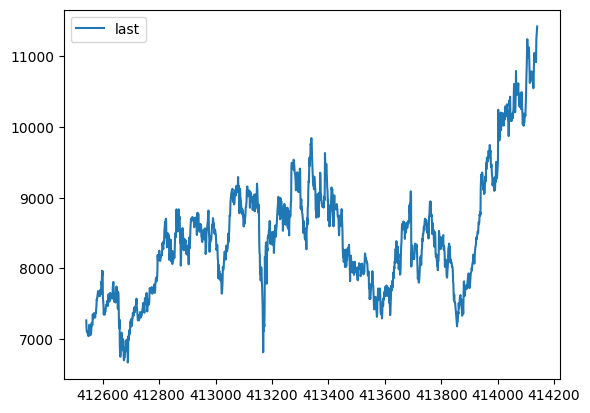

In [40]:
df_sub2.plot()

<Axes: >

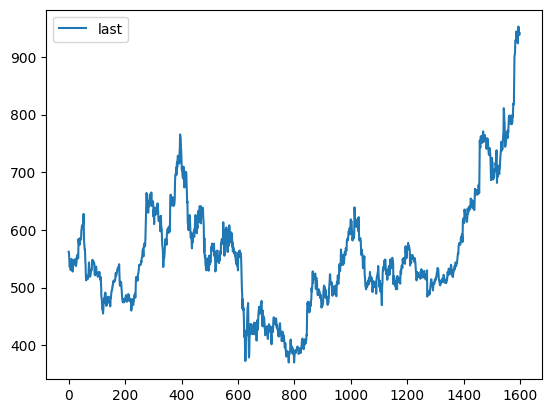

In [38]:
df_sub.plot()

# Index Mvmt DF and  Calculations (Task 1)

In [191]:
index = pd.DataFrame({'date' : mkt_cap['date'].unique(), 'total_mkt_cap' : mkt_cap['total'].unique(), "idx_pt" : np.nan})

In [192]:
index

,date,total_mkt_cap,idx_pt
0,2017-08-16,4.086578e+08,NaN
1,2017-08-17,4.083543e+08,NaN
2,2017-08-18,4.039069e+08,NaN
3,2017-08-21,4.029237e+08,NaN
4,2017-08-22,4.031508e+08,NaN
...,...,...,...
1594,2024-02-29,7.200298e+08,NaN
1595,2024-03-01,7.300685e+08,NaN
1596,2024-03-04,7.299549e+08,NaN
1597,2024-03-05,7.339423e+08,NaN


In [194]:
index.loc[index['date'] == '2020-06-01']

,date,total_mkt_cap,idx_pt
677,2020-06-01,4.064412e+08,1000.0


In [193]:
index.loc[677, 'idx_pt'] = 1000

In [204]:
base_mkt_cap = index.loc[index['date'] == '2020-06-01']["total_mkt_cap"]
base_idx_pt = index.loc[index['date'] == '2020-06-01']["idx_pt"]


In [206]:
base_idx_pt + 10

677    1010.0
Name: idx_pt, dtype: float64

In [210]:
index["idx_pt"] = index["total_mkt_cap"].apply(lambda x : x / base_mkt_cap * base_idx_pt)

In [211]:
index

,date,total_mkt_cap,idx_pt
0,2017-08-16,4.086578e+08,1005.453780
1,2017-08-17,4.083543e+08,1004.706990
2,2017-08-18,4.039069e+08,993.764772
3,2017-08-21,4.029237e+08,991.345517
4,2017-08-22,4.031508e+08,991.904293
...,...,...,...
1594,2024-02-29,7.200298e+08,1771.547187
1595,2024-03-01,7.300685e+08,1796.246209
1596,2024-03-04,7.299549e+08,1795.966802
1597,2024-03-05,7.339423e+08,1805.777431


Text(0, 0.5, 'Index points')

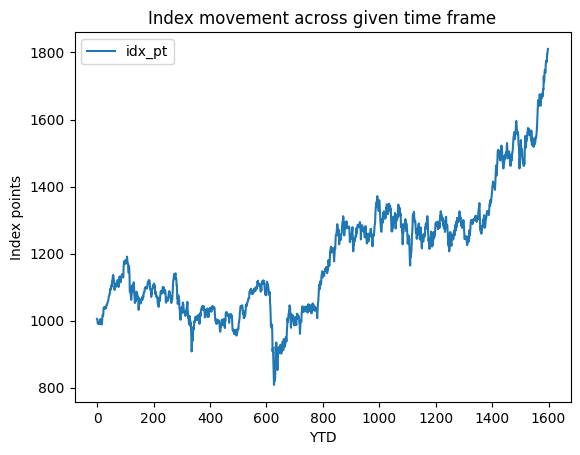

In [237]:

idx_plot = index[["date", "idx_pt"]].plot(title = "Index movement across given time frame")
idx_plot.set_xlabel("YTD")
idx_plot.set_ylabel("Index points")


# 2021-01 Daily Return and Top Index Contributors (Task 2)

In [220]:
mkt_cap

,ticker,date,mkt_cap,weight,total
0,1332 JT,2017-08-16,199642.95,0.000489,4.086578e+08
1,1332 JT,2017-08-17,199018.09,0.000487,4.083543e+08
2,1332 JT,2017-08-18,196518.64,0.000487,4.039069e+08
3,1332 JT,2017-08-21,193394.34,0.000480,4.029237e+08
4,1332 JT,2017-08-22,190270.04,0.000472,4.031508e+08
...,...,...,...,...,...
420532,9984 JT,2024-02-29,12921258.07,0.017945,7.200298e+08
420533,9984 JT,2024-03-01,13093247.51,0.017934,7.300685e+08
420534,9984 JT,2024-03-04,13132937.38,0.017991,7.299549e+08
420535,9984 JT,2024-03-05,13241717.03,0.018042,7.339423e+08


In [236]:
mkt_cap.loc[mkt_cap['date'] == '2021-01-29']

,ticker,date,mkt_cap,weight,total
840,1332 JT,2021-01-29,136532.03,0.000285,4.784593e+08
2439,1333 JT,2021-01-29,123954.37,0.000259,4.784593e+08
4038,1334 JT,2021-01-29,84317.35,0.000176,4.784593e+08
5637,1605 JT,2021-01-29,884705.78,0.001849,4.784593e+08
7236,1721 JT,2021-01-29,437100.00,0.000914,4.784593e+08
...,...,...,...,...,...
413382,9735 JT,2021-01-29,2210945.49,0.004621,4.784593e+08
414981,9766 JT,2021-01-29,918400.00,0.001919,4.784593e+08
416580,9843 JT,2021-01-29,2379280.28,0.004973,4.784593e+08
418179,9983 JT,2021-01-29,9527535.78,0.019913,4.784593e+08


In [ ]:
# January 2021 df

start_index = mkt_cap.loc[mkt_cap['date'] == '2021-01-04'] # Holidays
end_index = mkt_cap.loc[mkt_cap['date'] == '2021-01-29'] # Holidays

print(start_index, end_index)

January_Prices = mkt_cap[mkt_cap['date'].str.contains('2021-01')]

# Using the weight of the previous day to calculate contribution to market cap



In [ ]:
January_Prices["shifted_cap"] = January_Prices.groupby('ticker')['mkt_cap'].shift(1)
January_Prices["idx_move"] = (January_Prices['shifted_cap'] - January_Prices['mkt_cap'])*January_Prices['weight']

In [247]:
January_Prices

,ticker,date,mkt_cap,weight,total,shifted_cap,idx_move
822,1332 JT,2021-01-04,131533.15,0.000277,4.742796e+08,NaN,NaN
823,1332 JT,2021-01-05,130908.29,0.000277,4.727470e+08,131533.15,0.173030
824,1332 JT,2021-01-06,133407.73,0.000281,4.743451e+08,130908.29,-0.702958
825,1332 JT,2021-01-07,133720.16,0.000277,4.823256e+08,133407.73,-0.086618
826,1332 JT,2021-01-08,136219.60,0.000278,4.904666e+08,133720.16,-0.694181
...,...,...,...,...,...,...,...
419774,9984 JT,2021-01-25,18106151.36,0.036624,4.943779e+08,18390366.10,10409.112774
419775,9984 JT,2021-01-26,18108241.17,0.036939,4.902201e+08,18106151.36,-77.195497
419776,9984 JT,2021-01-27,17959864.35,0.036439,4.928813e+08,18108241.17,5406.631778
419777,9984 JT,2021-01-28,17314111.72,0.035587,4.865286e+08,17959864.35,22980.425205


In [250]:

contributors = {'date' : [], 'positive' : [], 'negative' : [] }

for date in January_Prices['date'].unique():
  top_pos_cont = January_Prices.loc[January_Prices['date'] == date].sort_values('idx_move', ascending=False).head(5)
  top_neg_cont = January_Prices.loc[January_Prices['date'] == date].sort_values('idx_move', ascending=True).head(5)
  contributors['date'].append(date)
  contributors['positive'].append(top_pos_cont)
  contributors['negative'].append(top_neg_cont)


In [297]:
# Clean data by removing values at date 0, since in this model all calculations are done at close, however an equivalent model can be made for calculations at open

del contributors['date'][0]
del contributors['positive'][0]
del contributors['negative'][0]

In [298]:
contributors['positive'][0]

,ticker,date,mkt_cap,weight,total,shifted_cap,idx_move
267856,7203 JT,2021-01-05,25490536.41,0.053920,4.727470e+08,25869044.12,20409.149807
240673,6861 JT,2021-01-05,13857973.83,0.029314,4.727470e+08,14023355.06,4847.939184
418162,9983 JT,2021-01-05,9458587.91,0.020008,4.727470e+08,9658006.38,3989.908104
106357,4519 JT,2021-01-05,8944340.19,0.018920,4.727470e+08,9144148.05,3780.350657
111154,4568 JT,2021-01-05,7465889.44,0.015793,4.727470e+08,7689228.01,3527.089613


In [299]:
contributors['negative'][0]

,ticker,date,mkt_cap,weight,total,shifted_cap,idx_move
229480,6758 JT,2021-01-05,13329391.32,0.028196,4.727470e+08,13159148.38,-4800.103893
251866,6981 JT,2021-01-05,6500657.57,0.013751,4.727470e+08,6356709.13,-1979.408637
307831,8035 JT,2021-01-05,6112360.22,0.012929,4.727470e+08,5959865.64,-1971.671493
213490,6594 JT,2021-01-05,7948471.96,0.016813,4.727470e+08,7838159.33,-1854.727426
85570,4063 JT,2021-01-05,7524930.04,0.015917,4.727470e+08,7431180.91,-1492.247711


# Sector Returns (Task 3)

In [254]:
# Daily return of all stocks in a dector

# Daily return = change in price * volume per day
# Group by sector
# Plot density

sector

,ticker,bics_sector
0,1332 JT,"Consumer, Non-cyclical"
1,1333 JT,"Consumer, Non-cyclical"
2,1334 JT,"Consumer, Non-cyclical"
3,1605 JT,Energy
4,1721 JT,Industrial
...,...,...
258,9735 JT,"Consumer, Non-cyclical"
259,9766 JT,Technology
260,9843 JT,"Consumer, Cyclical"
261,9983 JT,"Consumer, Cyclical"


In [ ]:
# Daily return in 2022:

dlyrt = last[last['date'].str.contains('2022')]
dlyrt["shifted_stock"] = dlyrt.groupby('ticker')['last'].shift(1)
dlyrt['daily_return'] = dlyrt['shifted_stock'] - dlyrt['last']
dlyrt = pd.merge(dlyrt, sector)

In [270]:
dlyrt

,ticker,date,last,shifted_stock,daily_return,bics_sector
0,1332 JT,2022-01-04,518.66,NaN,NaN,"Consumer, Non-cyclical"
1,1332 JT,2022-01-05,527.13,518.66,-8.47,"Consumer, Non-cyclical"
2,1332 JT,2022-01-06,517.72,527.13,9.41,"Consumer, Non-cyclical"
3,1332 JT,2022-01-07,513.01,517.72,4.71,"Consumer, Non-cyclical"
4,1332 JT,2022-01-11,514.90,513.01,-1.89,"Consumer, Non-cyclical"
...,...,...,...,...,...,...
64167,9984 JT,2022-12-26,5733.79,5712.95,-20.84,Communications
64168,9984 JT,2022-12-27,5751.65,5733.79,-17.86,Communications
64169,9984 JT,2022-12-28,5667.30,5751.65,84.35,Communications
64170,9984 JT,2022-12-29,5575.01,5667.30,92.29,Communications


In [285]:
sector_dlyrt = dlyrt.groupby(['date', 'bics_sector'])['daily_return'].mean().reset_index()
pivot_df = pd.pivot_table(sector_dlyrt, values='daily_return', index='date', columns='bics_sector')

In [282]:
sector_dlyrt

,date,daily_return
0,2022-01-04,NaN
1,2022-01-05,-10.228931
2,2022-01-06,89.170000
3,2022-01-07,16.971145
4,2022-01-11,49.405725
...,...,...
239,2022-12-26,-18.109049
240,2022-12-27,-8.374753
241,2022-12-28,7.343612
242,2022-12-29,19.834639


In [276]:
sector['bics_sector'].nunique()

9

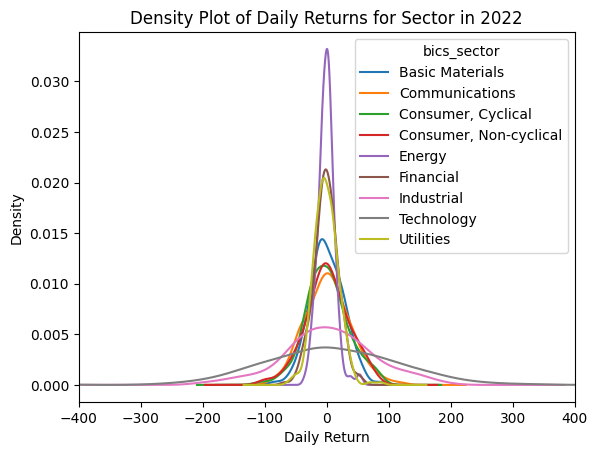

In [288]:
import matplotlib.pyplot as plt
pivot_df.plot(kind = 'density')
plt.xlim(-400,400)
plt.xlabel('Daily Return')
plt.title('Density Plot of Daily Returns for Sector in 2022')
plt.show()

# Index Dataframe + Calculations (Task 1 EXTRAS)




In [175]:
index = mkt_cap[["date", "total"]].copy()

def IndexPoints():
  pass

In [176]:
index.rename(columns = {"total": "total_mkt_cap"})

,date,total_mkt_cap
0,2017-08-16,4.086578e+08
1,2017-08-17,4.083543e+08
2,2017-08-18,4.039069e+08
3,2017-08-21,4.029237e+08
4,2017-08-22,4.031508e+08
...,...,...
420532,2024-02-29,7.200298e+08
420533,2024-03-01,7.300685e+08
420534,2024-03-04,7.299549e+08
420535,2024-03-05,7.339423e+08


In [174]:
index

,date,total,index_pt
0,2017-08-16,4.086578e+08,0
1,2017-08-17,4.083543e+08,0
2,2017-08-18,4.039069e+08,0
3,2017-08-21,4.029237e+08,0
4,2017-08-22,4.031508e+08,0
...,...,...,...
420532,2024-02-29,7.200298e+08,0
420533,2024-03-01,7.300685e+08,0
420534,2024-03-04,7.299549e+08,0
420535,2024-03-05,7.339423e+08,0


In [164]:
index["index_pt"] = 0

In [173]:
index[index["date"] == '2020-06-01']["index_pt"] = 1000

<ipython-input-173-53d394c0edcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index[index["date"] == '2020-06-01']["index_pt"] = 1000


In [172]:
index.loc[index["date"] == '2020-06-01']

,date,total,index_pt
677,2020-06-01,4.064412e+08,0
2276,2020-06-01,4.064412e+08,0
3875,2020-06-01,4.064412e+08,0
5474,2020-06-01,4.064412e+08,0
7073,2020-06-01,4.064412e+08,0
...,...,...,...
413219,2020-06-01,4.064412e+08,0
414818,2020-06-01,4.064412e+08,0
416417,2020-06-01,4.064412e+08,0
418016,2020-06-01,4.064412e+08,0


In [161]:
index

,0,date,total_mkt_cap,index_pt
0,2017-08-16,2017-08-16,4.086578e+08,NaN
1,2017-08-17,2017-08-17,4.083543e+08,NaN
2,2017-08-18,2017-08-18,4.039069e+08,NaN
3,2017-08-21,2017-08-21,4.029237e+08,NaN
4,2017-08-22,2017-08-22,4.031508e+08,NaN
...,...,...,...,...
1594,2024-02-29,2024-02-29,7.200298e+08,NaN
1595,2024-03-01,2024-03-01,7.300685e+08,NaN
1596,2024-03-04,2024-03-04,7.299549e+08,NaN
1597,2024-03-05,2024-03-05,7.339423e+08,NaN


In [114]:
mkt_cap

,ticker,date,mkt_cap,weight,total
0,1332 JT,2017-08-16,199642.95,0.000489,4.086578e+08
1,1332 JT,2017-08-17,199018.09,0.000487,4.083543e+08
2,1332 JT,2017-08-18,196518.64,0.000487,4.039069e+08
3,1332 JT,2017-08-21,193394.34,0.000480,4.029237e+08
4,1332 JT,2017-08-22,190270.04,0.000472,4.031508e+08
...,...,...,...,...,...
420532,9984 JT,2024-02-29,12921258.07,0.017945,7.200298e+08
420533,9984 JT,2024-03-01,13093247.51,0.017934,7.300685e+08
420534,9984 JT,2024-03-04,13132937.38,0.017991,7.299549e+08
420535,9984 JT,2024-03-05,13241717.03,0.018042,7.339423e+08


In [ ]:
mkt_cap["weight"] = mkt_cap["mkt_cap"]/

In [21]:
last
# 263 Unique tickers

,ticker,date,last
0,1332 JT,2017-08-16,562.12
1,1332 JT,2017-08-17,560.36
2,1332 JT,2017-08-18,553.32
3,1332 JT,2017-08-21,544.53
4,1332 JT,2017-08-22,535.73
...,...,...,...
420532,9984 JT,2024-02-29,8790.00
420533,9984 JT,2024-03-01,8907.00
420534,9984 JT,2024-03-04,8934.00
420535,9984 JT,2024-03-05,9008.00


In [45]:
mkt_cap

,ticker,date,mkt_cap
0,1332 JT,2017-08-16,199642.95
1,1332 JT,2017-08-17,199018.09
2,1332 JT,2017-08-18,196518.64
3,1332 JT,2017-08-21,193394.34
4,1332 JT,2017-08-22,190270.04
...,...,...,...
420532,9984 JT,2024-02-29,12921258.07
420533,9984 JT,2024-03-01,13093247.51
420534,9984 JT,2024-03-04,13132937.38
420535,9984 JT,2024-03-05,13241717.03


In [225]:
mkt_cap.loc[mkt_cap["ticker"] == '1332 JT'][mkt_cap["date"] == '2021-01-01']["mkt_cap"]

<ipython-input-225-74b846c296e9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt_cap.loc[mkt_cap["ticker"] == '1332 JT'][mkt_cap["date"] == '2021-01-01']["mkt_cap"]


Series([], Name: mkt_cap, dtype: float64)

In [72]:
ls = last.loc[last["ticker"] == '1332 JT'][last["date"] == '2020-01-06']["last"]

<ipython-input-72-99b6e6b74925>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ls = last.loc[last["ticker"] == '1332 JT'][last["date"] == '2020-01-06']["last"]


In [73]:
print(ls)

580    570.73
Name: last, dtype: float64


In [70]:
print(mc1332JT)

580    196518.64
Name: mkt_cap, dtype: float64


In [39]:
#identify top performing stocks

df_sub = last.loc[last["ticker"] == '1332 JT']
df_sub = df_sub[["last", "date"]]
df_sub2 = last.loc[last["ticker"] == '9735 JT']
df_sub2 = df_sub2[["last", "date"]]

In [76]:

mktc_sub = mkt_cap.loc[mkt_cap["ticker"] == '1332 JT']
mktc_sub = mktc_sub[["mkt_cap", "date"]]

<Axes: >

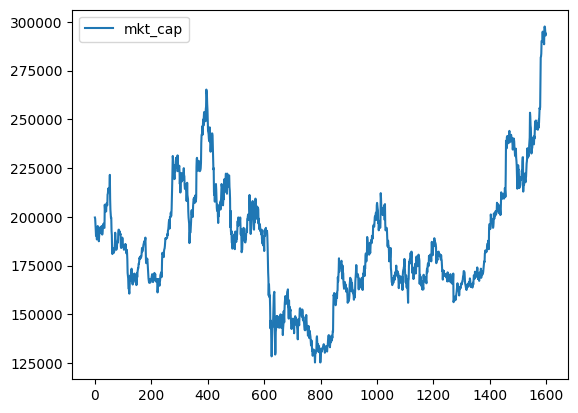

In [77]:
mktc_sub.plot()

# Extra/Unused attempts

In [51]:
class Index:
  def __init__(self):
    global mkt_cap, sector, last, volume
    self.base_pt = 1000
    self.date = '2020-06-01'
    self.base_mkt_cap = self.BaseMktVal('2020-01-06')
    self.current_mkt_val = 0
    self.current_pt = 1000
    self.mkt_cap = mkt_cap
    self.sector = sector
    self.last = last
    self.volume = volume

  def BaseMktVal(self, date):
    # Base Point = 1000 on given date, find the base market value on given date.
    mkt_cap_date = self.mkt_cap.loc[mkt_cap["date"] == date]
    base_total_mkt_cap = mkt_cap_date["mkt_cap"].sum()
    self.base_mkt_cap = base_total_mkt_cap


In [291]:
January_Prices

,ticker,date,mkt_cap,weight,total,shifted_cap,idx_move
822,1332 JT,2021-01-04,131533.15,0.000277,4.742796e+08,NaN,NaN
823,1332 JT,2021-01-05,130908.29,0.000277,4.727470e+08,131533.15,0.173030
824,1332 JT,2021-01-06,133407.73,0.000281,4.743451e+08,130908.29,-0.702958
825,1332 JT,2021-01-07,133720.16,0.000277,4.823256e+08,133407.73,-0.086618
826,1332 JT,2021-01-08,136219.60,0.000278,4.904666e+08,133720.16,-0.694181
...,...,...,...,...,...,...,...
419774,9984 JT,2021-01-25,18106151.36,0.036624,4.943779e+08,18390366.10,10409.112774
419775,9984 JT,2021-01-26,18108241.17,0.036939,4.902201e+08,18106151.36,-77.195497
419776,9984 JT,2021-01-27,17959864.35,0.036439,4.928813e+08,18108241.17,5406.631778
419777,9984 JT,2021-01-28,17314111.72,0.035587,4.865286e+08,17959864.35,22980.425205


In [ ]:
_